# `Slice` and `AlignmentDataset` objects

The `paste3.dataset` module provides an easy-to-use API to access input datasets to the `paste3` alignment algorithms.

The `Slice` class is a thin layer on top of an `AnnData` class, and an `AlignmentDataset` class is a collection of `Slice` objects.

In [1]:
from pathlib import Path

from paste3.dataset import AlignmentDataset
from paste3.napari.data.ondemand import get_file

Individual `Slice` objects are created by providing a path to an `.h5ad` file. Each `.h5ad` file is expected to contain an `AnnData` object, and is internally read using a `scanpy.read_h5ad`.

Here we download and cache a few `.h5ad` files locally using a `paste3.napari.data.ondemand.get_file` call. These are the files available as the Sample Data in the `paste3` napari plugin.

In [2]:
slice_files = [Path(f) for f in get_file("paste3_sample_patient_2_")]

A dataset is created using the paths to the individual slices.

In [3]:
dataset = AlignmentDataset(file_paths=slice_files)

Any individual slice can be rendered in a jupyter notebook by simply typing the slice variable name in a cell, which renders the slice using the `squidpy` library. (Note: This is roughly equivalent to doing `squidpy.pl.spatial_scatter(<slice>.adata, ..)`)

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


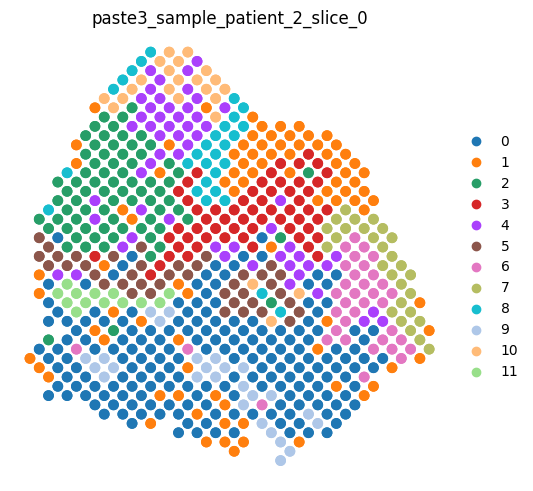

In [4]:
dataset.slices[0]

An entire dataset can be rendered by typing the dataset variable name in a cell, which renders each slice in order.

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


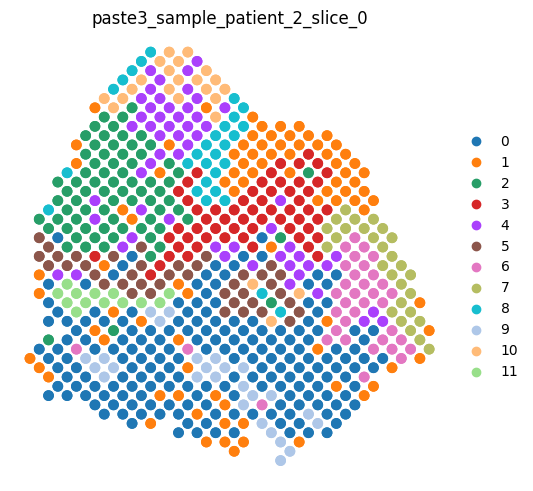

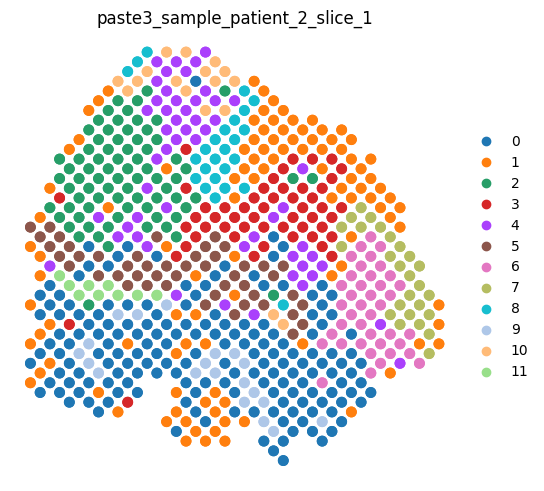

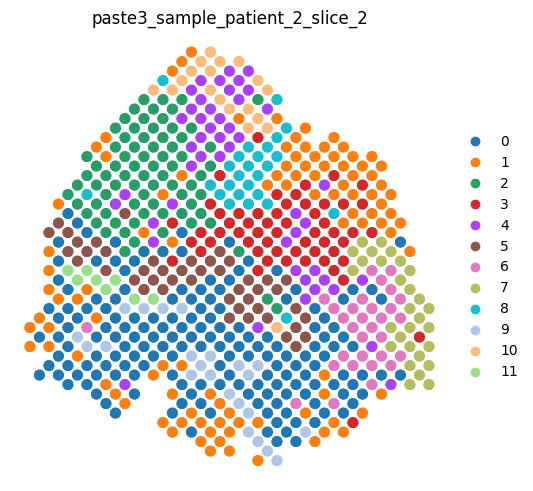

In [5]:
dataset

## Center Aligning a Dataset

A dataset object can be center aligned in 2 steps:

1. Find the "center slice" (or the "consensus slice") and similarity matrix between spots using the `<dataset>.find_center_slice` method. **This is a time consuming step and benefits from being run on a GPU-enabled environment.**
2. Use these values to center align the dataset using the `<dataset>.center_align` method.

The first returned value is the aligned dataset, along with other useful information (rotations/translations). Here we ignore all returned values except the first one.

Center alignment is explained in detail in the [Paste](https://www.nature.com/articles/s41592-022-01459-6) paper.

In [6]:
center_slice, pis = dataset.find_center_slice()
aligned_dataset, *_ = dataset.center_align(center_slice=center_slice, pis=pis)

(INFO) (dataset.py) (22-Nov-24 23:35:52) Finding center slice


(INFO) (paste.py) (22-Nov-24 23:35:52) GPU is not available, resorting to torch CPU.


(INFO) (paste.py) (22-Nov-24 23:35:52) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (22-Nov-24 23:36:19) Iteration: 0


(INFO) (paste.py) (22-Nov-24 23:36:19) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (22-Nov-24 23:36:19) Slice 0


(INFO) (paste.py) (22-Nov-24 23:36:20) Slice 1


(INFO) (paste.py) (22-Nov-24 23:36:21) Slice 2


(INFO) (paste.py) (22-Nov-24 23:36:21) center_ot done


(INFO) (paste.py) (22-Nov-24 23:36:21) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (22-Nov-24 23:36:32) Objective -142.82551312401904 | Difference: 142.82551312401904


(INFO) (paste.py) (22-Nov-24 23:36:32) Iteration: 1


(INFO) (paste.py) (22-Nov-24 23:36:32) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (22-Nov-24 23:36:32) Slice 0


(INFO) (paste.py) (22-Nov-24 23:36:32) Slice 1


(INFO) (paste.py) (22-Nov-24 23:36:33) Slice 2


(INFO) (paste.py) (22-Nov-24 23:36:33) center_ot done


(INFO) (paste.py) (22-Nov-24 23:36:33) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (22-Nov-24 23:36:45) Objective 0.8929499011353006 | Difference: 143.71846302515434


(INFO) (paste.py) (22-Nov-24 23:36:45) Iteration: 2


(INFO) (paste.py) (22-Nov-24 23:36:45) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (22-Nov-24 23:36:45) Slice 0


(INFO) (paste.py) (22-Nov-24 23:36:45) Slice 1


(INFO) (paste.py) (22-Nov-24 23:36:46) Slice 2


(INFO) (paste.py) (22-Nov-24 23:36:46) center_ot done


(INFO) (paste.py) (22-Nov-24 23:36:46) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (22-Nov-24 23:36:56) Objective 0.9046948938365269 | Difference: 0.011744992701226309


(INFO) (paste.py) (22-Nov-24 23:36:56) Iteration: 3


(INFO) (paste.py) (22-Nov-24 23:36:56) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (22-Nov-24 23:36:56) Slice 0


(INFO) (paste.py) (22-Nov-24 23:36:57) Slice 1


(INFO) (paste.py) (22-Nov-24 23:36:57) Slice 2


(INFO) (paste.py) (22-Nov-24 23:36:58) center_ot done


(INFO) (paste.py) (22-Nov-24 23:36:58) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (22-Nov-24 23:37:07) Objective 0.8987576825648873 | Difference: 0.0059372112716395975


(INFO) (paste.py) (22-Nov-24 23:37:07) Iteration: 4


(INFO) (paste.py) (22-Nov-24 23:37:07) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (22-Nov-24 23:37:07) Slice 0


(INFO) (paste.py) (22-Nov-24 23:37:07) Slice 1


(INFO) (paste.py) (22-Nov-24 23:37:08) Slice 2


(INFO) (paste.py) (22-Nov-24 23:37:08) center_ot done


(INFO) (paste.py) (22-Nov-24 23:37:08) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (22-Nov-24 23:37:18) Objective 0.9031373250624972 | Difference: 0.004379642497609915


(INFO) (paste.py) (22-Nov-24 23:37:18) Iteration: 5


(INFO) (paste.py) (22-Nov-24 23:37:18) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (22-Nov-24 23:37:18) Slice 0


(INFO) (paste.py) (22-Nov-24 23:37:19) Slice 1


(INFO) (paste.py) (22-Nov-24 23:37:19) Slice 2


(INFO) (paste.py) (22-Nov-24 23:37:20) center_ot done


(INFO) (paste.py) (22-Nov-24 23:37:20) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (22-Nov-24 23:37:29) Objective 0.8991881928194951 | Difference: 0.003949132243002085


(INFO) (paste.py) (22-Nov-24 23:37:29) Iteration: 6


(INFO) (paste.py) (22-Nov-24 23:37:29) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (22-Nov-24 23:37:29) Slice 0


(INFO) (paste.py) (22-Nov-24 23:37:30) Slice 1


(INFO) (paste.py) (22-Nov-24 23:37:30) Slice 2


(INFO) (paste.py) (22-Nov-24 23:37:30) center_ot done


(INFO) (paste.py) (22-Nov-24 23:37:30) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (22-Nov-24 23:37:39) Objective 0.900309545298158 | Difference: 0.0011213524786628515


(INFO) (paste.py) (22-Nov-24 23:37:39) Iteration: 7


(INFO) (paste.py) (22-Nov-24 23:37:40) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (22-Nov-24 23:37:40) Slice 0


(INFO) (paste.py) (22-Nov-24 23:37:40) Slice 1


(INFO) (paste.py) (22-Nov-24 23:37:40) Slice 2


(INFO) (paste.py) (22-Nov-24 23:37:41) center_ot done


(INFO) (paste.py) (22-Nov-24 23:37:41) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (22-Nov-24 23:37:50) Objective 0.9043067225053335 | Difference: 0.003997177207175517


(INFO) (paste.py) (22-Nov-24 23:37:50) Iteration: 8


(INFO) (paste.py) (22-Nov-24 23:37:50) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (22-Nov-24 23:37:50) Slice 0


(INFO) (paste.py) (22-Nov-24 23:37:51) Slice 1


(INFO) (paste.py) (22-Nov-24 23:37:51) Slice 2


(INFO) (paste.py) (22-Nov-24 23:37:52) center_ot done


(INFO) (paste.py) (22-Nov-24 23:37:52) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (22-Nov-24 23:38:02) Objective 0.9022400221241572 | Difference: 0.0020667003811762896


(INFO) (paste.py) (22-Nov-24 23:38:02) Iteration: 9


(INFO) (paste.py) (22-Nov-24 23:38:02) Solving Pairwise Slice Alignment Problem.


(INFO) (paste.py) (22-Nov-24 23:38:02) Slice 0


(INFO) (paste.py) (22-Nov-24 23:38:02) Slice 1


(INFO) (paste.py) (22-Nov-24 23:38:02) Slice 2


(INFO) (paste.py) (22-Nov-24 23:38:03) center_ot done


(INFO) (paste.py) (22-Nov-24 23:38:03) Solving Center Mapping NMF Problem.


(INFO) (paste.py) (22-Nov-24 23:38:13) Objective 0.9001356280171507 | Difference: 0.0021043941070064687


(INFO) (paste.py) (22-Nov-24 23:38:14) Center slice computed.


(INFO) (dataset.py) (22-Nov-24 23:38:14) Center aligning


(INFO) (dataset.py) (22-Nov-24 23:38:14) Stacking slices around center slice


We can render the center slice and the aligned dataset as usual.

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


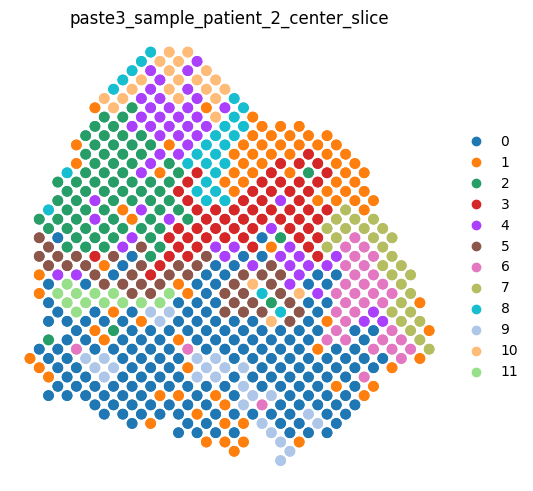

In [7]:
center_slice

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


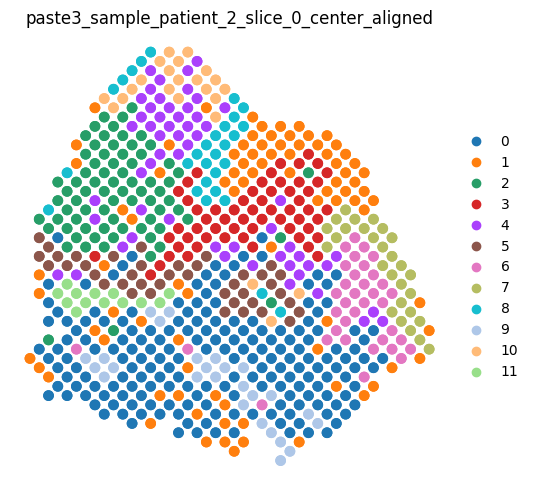

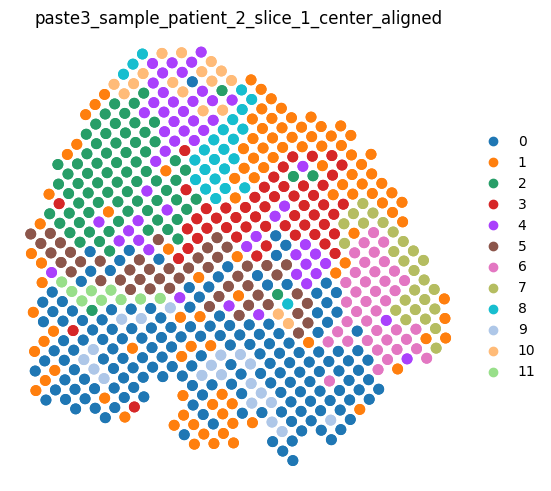

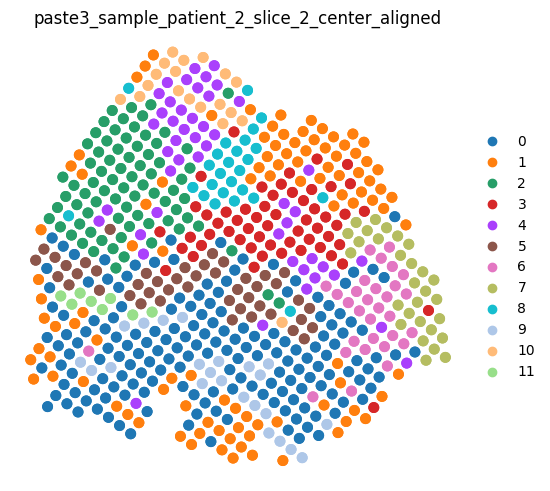

In [8]:
aligned_dataset

## Pairwise aligning a Dataset

A dataset can be pairwise aligned using the `<dataset>.pairwise_align` method. An `overlap_fraction` value (between 0 and 1) can be specified.

A value of `None` results in pairwise alignment that is identical to the approach mentioned in the [Paste](https://www.nature.com/articles/s41592-022-01459-6) paper. Any other value between 0 and 1 results in pairwise alignment explained in the [Paste2](https://pubmed.ncbi.nlm.nih.gov/37553263/) paper.

In [9]:
pairwise_aligned_dataset = dataset.pairwise_align(overlap_fraction=0.7)

(INFO) (dataset.py) (22-Nov-24 23:38:15) Finding Pi for slices 0 and 1


(INFO) (paste.py) (22-Nov-24 23:38:15) GPU is not available, resorting to torch CPU.


(INFO) (dataset.py) (22-Nov-24 23:38:17) Finding Pi for slices 1 and 2


(INFO) (paste.py) (22-Nov-24 23:38:17) GPU is not available, resorting to torch CPU.


/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:976: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


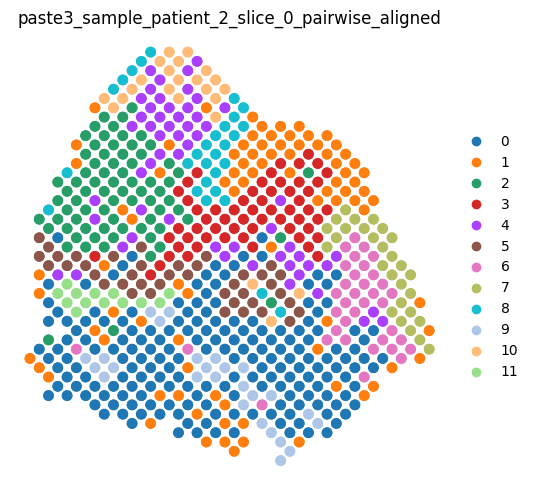

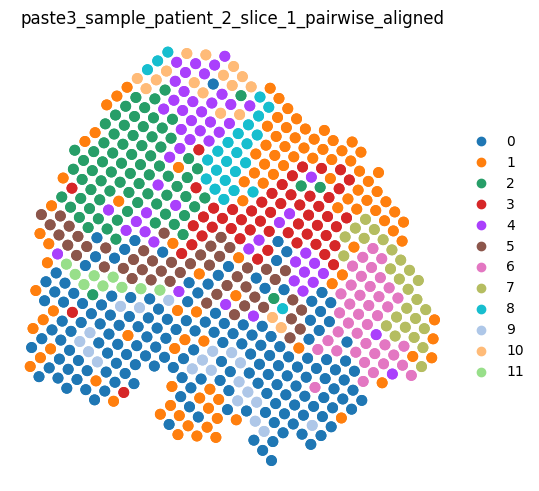

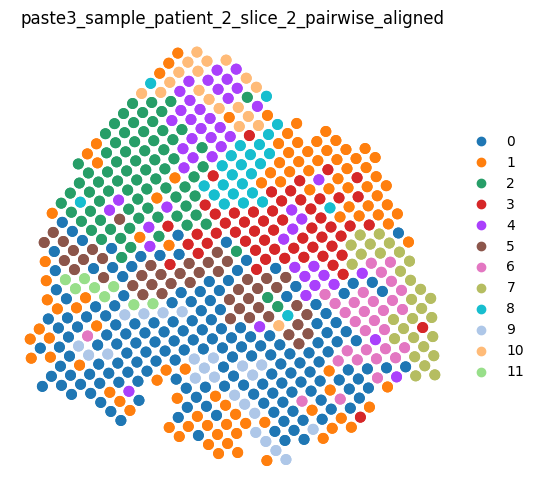

In [10]:
pairwise_aligned_dataset[0]